In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../Task 1/')
from efficient_apriori import apriori
from improved_apriori import Improved_Apriori
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Task 2/dataset/final_animedataset.csv')
data = data[['username', 'title']]
data = data.groupby('username')['title'].apply(list)
data = data.to_dict()

In [3]:
# Step 2: Frequent Itemset Generation
# Use the apriori algorithm to generate frequent itemsets
apriori = Improved_Apriori(data, min_support=0.4, min_confidence=1)
frequent_itemsets = apriori.apriori()
frequent_itemsets

100%|██████████| 78/78 [00:01<00:00, 52.75it/s]
0it [00:00, ?it/s]


{1: {('Angel Beats!',): 65303,
  ('Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.',): 49456,
  ('Another',): 51658,
  ('Ao no Exorcist',): 53028,
  ('Bakemonogatari',): 57273,
  ('Bleach',): 63861,
  ('Byousoku 5 Centimeter',): 47041,
  ('Clannad',): 63023,
  ('Clannad: After Story',): 50104,
  ('Code Geass: Hangyaku no Lelouch',): 71414,
  ('Code Geass: Hangyaku no Lelouch R2',): 58654,
  ('Cowboy Bebop',): 51706,
  ('Darker than Black: Kuro no Keiyakusha',): 51982,
  ('Death Note',): 85642,
  ('Durarara!!',): 59267,
  ('Elfen Lied',): 68075,
  ('Fairy Tail',): 53143,
  ('Fate/stay night',): 48914,
  ('Fullmetal Alchemist',): 61241,
  ('Fullmetal Alchemist: Brotherhood',): 67132,
  ('Highschool of the Dead',): 55774,
  ('Higurashi no Naku Koro ni',): 49684,
  ('K-On!',): 50388,
  ('Mahou Shoujo Madoka★Magica',): 48549,
  ('Mirai Nikki (TV)',): 57010,
  ('Naruto',): 66343,
  ('Naruto: Shippuuden',): 53626,
  ('Neon Genesis Evangelion',): 52984,
  ('No Game No Life',): 48171,


In [4]:
# Create a binary matrix
# Flatten the dictionary into a list of itemsets
itemsets = [itemset for level in frequent_itemsets.values() for itemset in level.keys()]

# Transactions 
transactions = list(data.values())

binary_matrix = pd.DataFrame(0, index=range(len(transactions)), columns=itemsets)

# Fill in the binary matrix
for i, transaction in enumerate(transactions):
    for itemset in itemsets:
        if set(itemset).issubset(transaction):
            binary_matrix.at[i, itemset] = 1  # Use 'at' instead of 'loc' for scalar indexing

binary_matrix


,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
0,0,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,1,0,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,0,1,1
116122,1,1,1,0,0,0,0,1,1,1,...,0,1,1,0,1,0,0,0,0,0


In [5]:
pca = PCA(n_components=2, random_state=42)
transformed_data = pca.fit_transform(binary_matrix)

In [6]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(transformed_data, quantile=0.3)
print("Estimated bandwidth:", bandwidth)

Estimated bandwidth: 2.750468907708416


In [7]:
ms = MeanShift(bandwidth=bandwidth)  
ms.fit(transformed_data)
cluster_centers = ms.cluster_centers_
labels = ms.labels_

# print("Cluster centers:")
# print(cluster_centers)
print("Labels:")
print(labels)

Labels:
[0 0 0 ... 1 2 2]


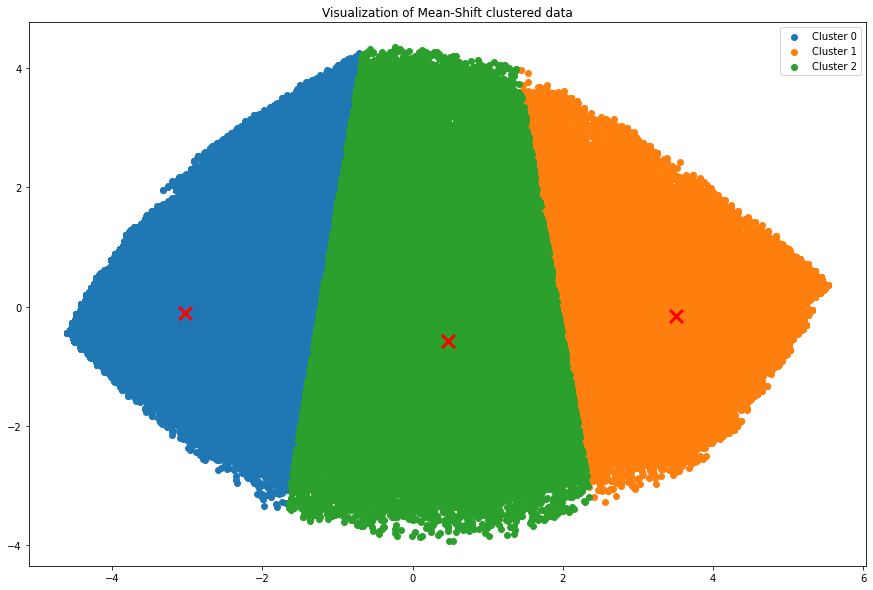

In [11]:
cluster_labels = ms.labels_
cluster_centers = ms.cluster_centers_
plt.figure(figsize=(15,10))
for i in range(len(np.unique(cluster_labels))):
    plt.scatter(transformed_data[cluster_labels == i, 0], transformed_data[cluster_labels == i, 1], label='Cluster '+str(i))
plt.legend()
plt.scatter(cluster_centers [:, 0], cluster_centers[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
plt.title('Visualization of Mean-Shift clustered data')
plt.show()

In [12]:
binary_matrix['MeanShift_cluster'] = cluster_labels

In [13]:
# Interpreting the itemset frequencies in each cluster
cluster_itemset_frequencies = binary_matrix.groupby('MeanShift_cluster').sum()
cluster_itemset_frequencies

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Naruto, Naruto: Shippuuden)","(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)"
MeanShift_cluster,,,,,,,,,,,,,,,,,,,,,
0,9903,6171,6664,7368,8317,18010,8411,12219,8049,13629,...,11408,2815,5079,3059,2697,3956,5645,4415,2586,2018
1,33834,27829,28611,28922,30541,28136,24045,31136,26830,35837,...,24776,31343,31901,29843,31287,29913,31775,30623,33448,31709
2,21566,15456,16383,16738,18415,17715,14585,19668,15225,21948,...,14238,15618,18101,14381,15102,14714,13680,11576,11615,13950


In [14]:
binary_matrix

,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Shingeki no Kyojin, Steins;Gate)","(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)",MeanShift_cluster
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,0,0,0,1,2
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
116122,1,1,1,0,0,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,2


In [18]:
import ast
binary_matrix['anime_level'] = binary_matrix.apply(lambda row: max([len(col) for col, val in row.items() if val == 1 and col != 'MeanShift_cluster' and col!='anime_level'], default=0), axis=1)
binary_matrix


,"(Angel Beats!,)","(Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,)","(Another,)","(Ao no Exorcist,)","(Bakemonogatari,)","(Bleach,)","(Byousoku 5 Centimeter,)","(Clannad,)","(Clannad: After Story,)","(Code Geass: Hangyaku no Lelouch,)",...,"(Shingeki no Kyojin, Sword Art Online)","(Shingeki no Kyojin, Toradora!)","(Steins;Gate, Sword Art Online)","(Sword Art Online, Toradora!)","(Code Geass: Hangyaku no Lelouch, Code Geass: Hangyaku no Lelouch R2, Death Note)","(Code Geass: Hangyaku no Lelouch, Death Note, Elfen Lied)","(Code Geass: Hangyaku no Lelouch, Death Note, Fullmetal Alchemist: Brotherhood)","(Death Note, Shingeki no Kyojin, Sword Art Online)",MeanShift_cluster,anime_level
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,1,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,0,0,0,1,2,3
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116119,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
116120,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,3
116121,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,3
116122,1,1,1,0,0,0,0,1,1,1,...,1,0,1,0,0,0,0,0,2,2


In [21]:
cluster_anime_level_counts = binary_matrix.groupby(['MeanShift_cluster', 'anime_level']).size()
cluster_anime_level_counts

MeanShift_cluster  anime_level
0                  0               2705
                   1               7606
                   2              27557
                   3               9442
1                  2                198
                   3              36298
2                  2               7802
                   3              24516
dtype: int64

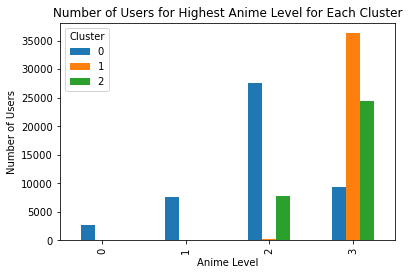

In [22]:
df_counts = cluster_anime_level_counts.reset_index(name='counts')

df_pivot = df_counts.pivot(index='anime_level', columns='MeanShift_cluster', values='counts')

# Replace NaN values with 0
df_pivot.fillna(0, inplace=True)

# Create a bar plot
df_pivot.plot.bar()

# Add labels and title
plt.xlabel('Anime Level')
plt.ylabel('Number of Users')
plt.title('Number of Users for Highest Anime Level for Each Cluster')
plt.legend(title='Cluster')

# Show the plot
plt.show()